<a href="https://colab.research.google.com/github/varshith-017/Regression_project/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
upload=files.upload()

Saving car data.csv to car data.csv


In [5]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set() # Setting a default seaborn setting in plots

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_squared_error

# Input data files are available in the read-only "../input/" directory

#For example, running this (by clicking run or pressing Shift+Enter) will

import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

      print(os.path.join(dirname, filename))

In [63]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().mean()

,0
Car_Name,0.0
Year,0.0
Selling_Price,0.0
Present_Price,0.0
Kms_Driven,0.0
Fuel_Type,0.0
Seller_Type,0.0
Transmission,0.0
Owner,0.0


In [59]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [61]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [17]:
print(df['Fuel_Type'].unique())

print(df['Seller_Type'].unique())

print(df['Transmission'].unique())

print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

/tmp/ipython-input-1475824536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Year)


<Axes: xlabel='Year', ylabel='Density'>

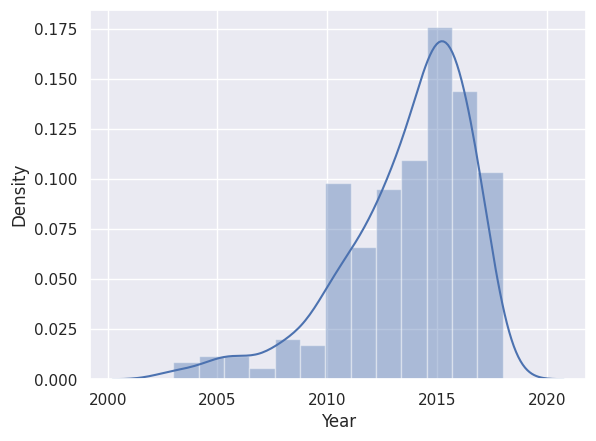

In [20]:
sns.distplot(df.Year)

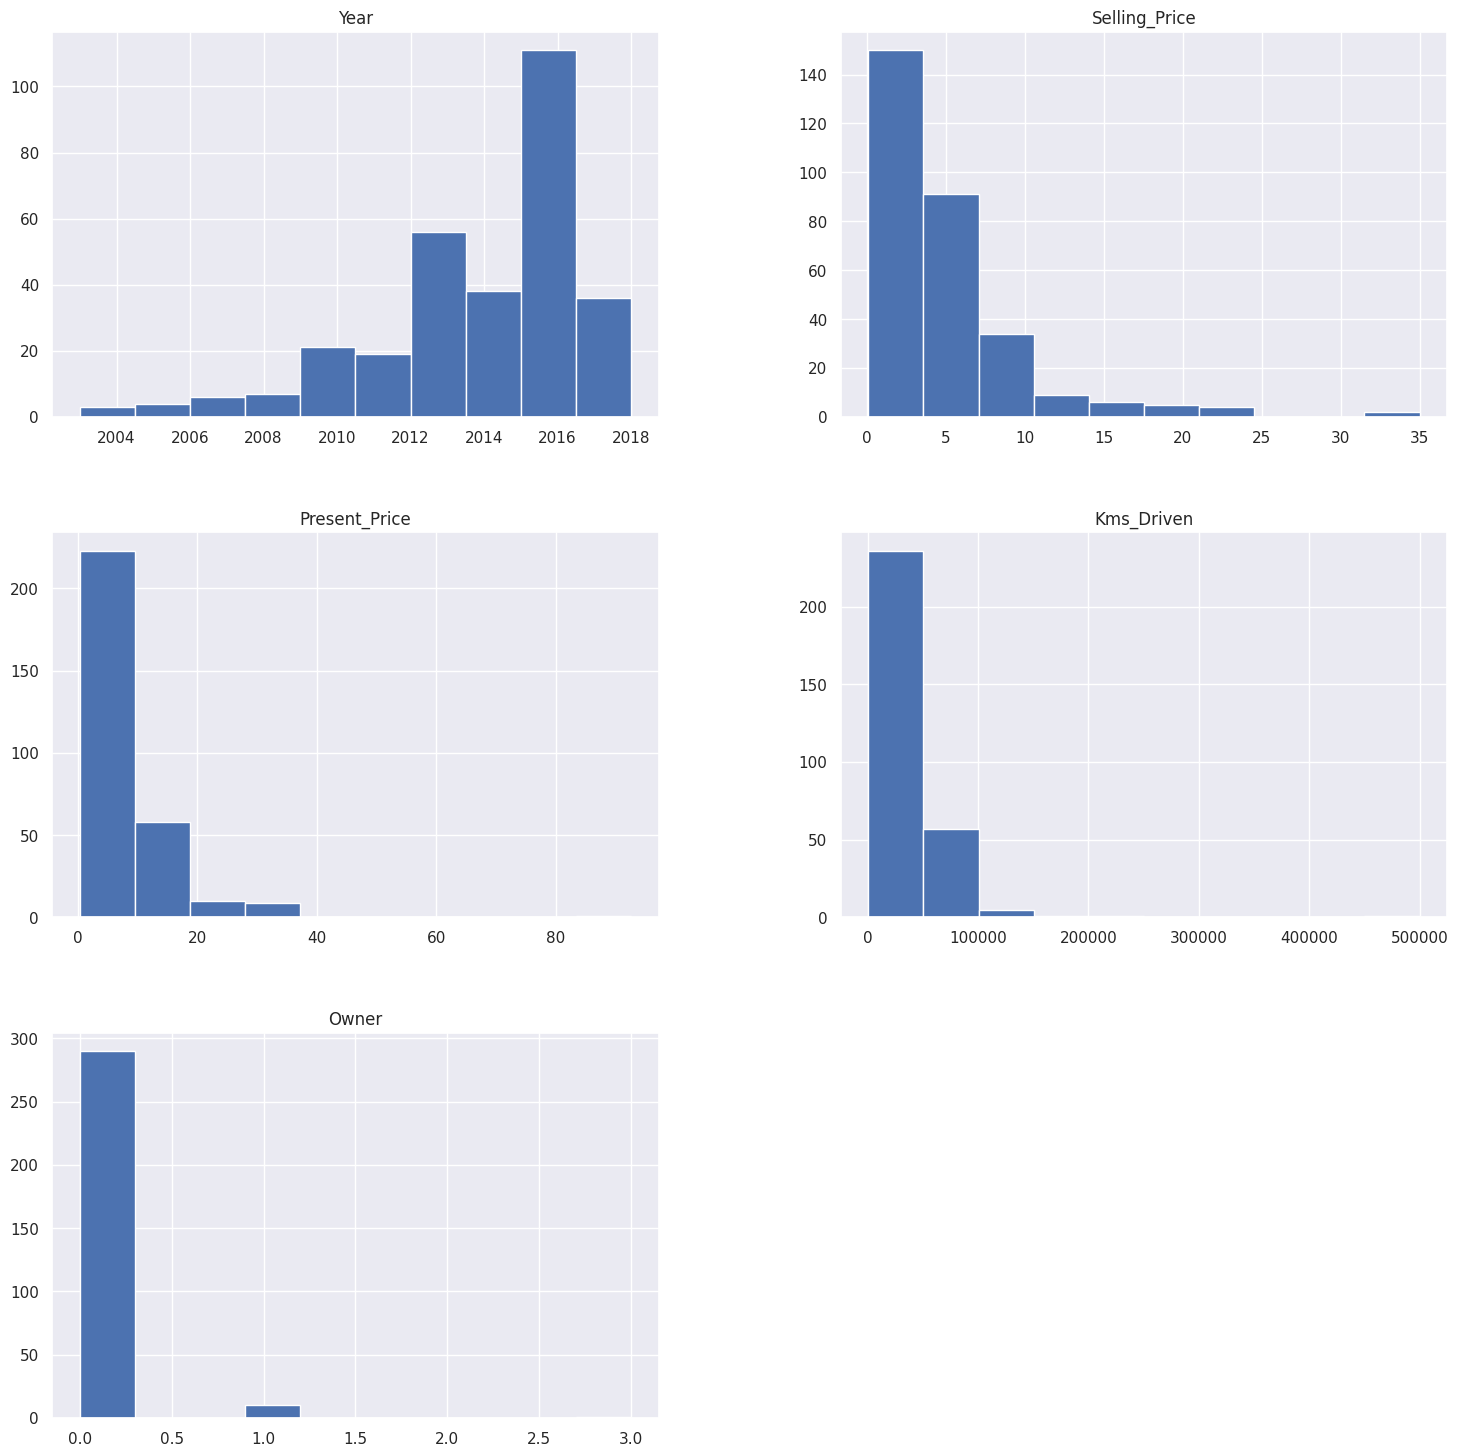

In [26]:
fig=df.hist(figsize=(18,18))

/tmp/ipython-input-3808127424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

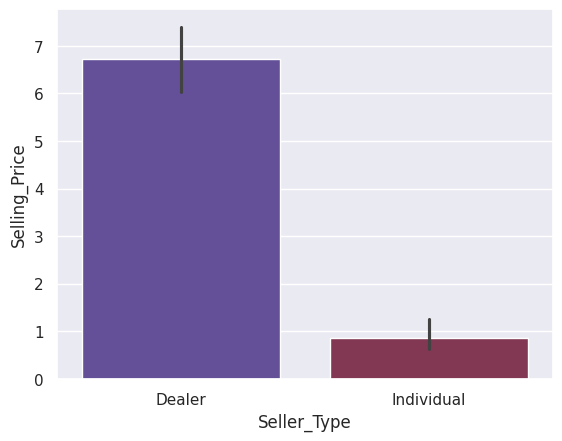

In [31]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='twilight')

<Axes: xlabel='Selling_Price', ylabel='Year'>

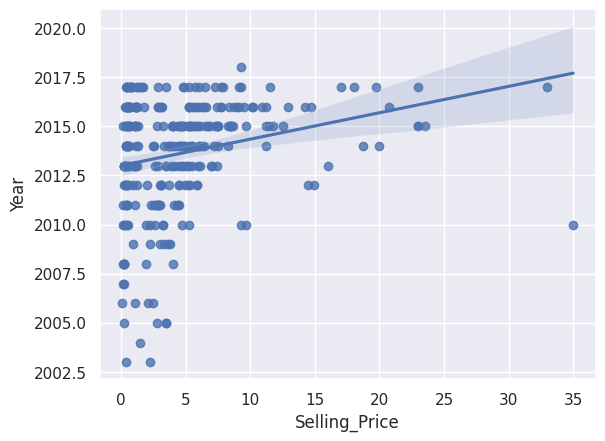

In [33]:
sns.regplot(x='Selling_Price',y='Year',data=df)

/tmp/ipython-input-1725234513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

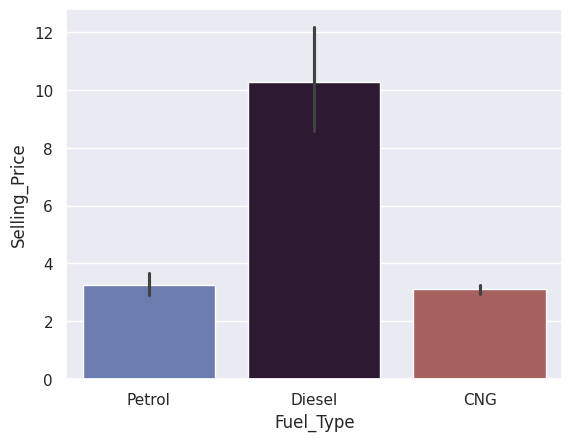

In [37]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='twilight')

<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

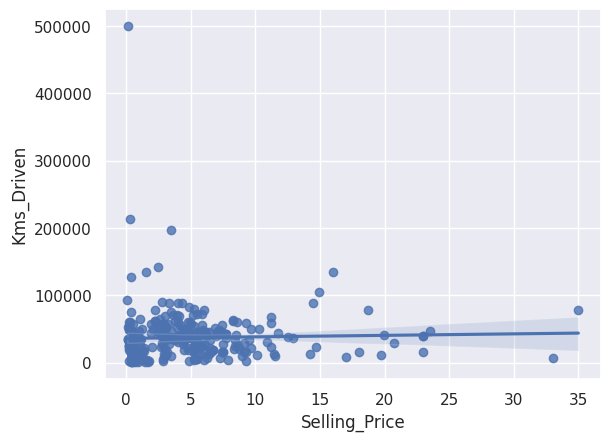

In [39]:
sns.regplot(x='Selling_Price',y='Kms_Driven',data=df)

/tmp/ipython-input-1098498626.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

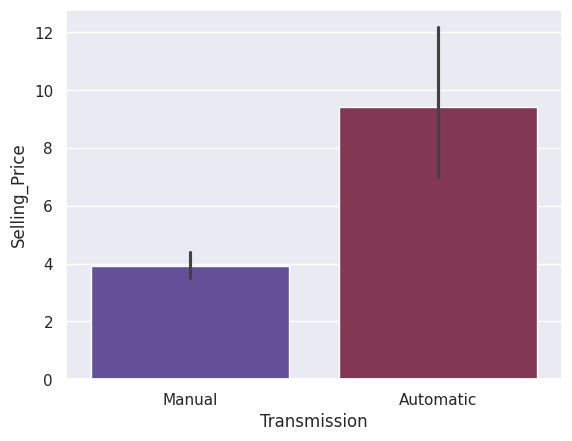

In [41]:
sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='twilight')

/tmp/ipython-input-471597317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner',y='Selling_Price',data=df,palette='ocean')


<Axes: xlabel='Owner', ylabel='Selling_Price'>

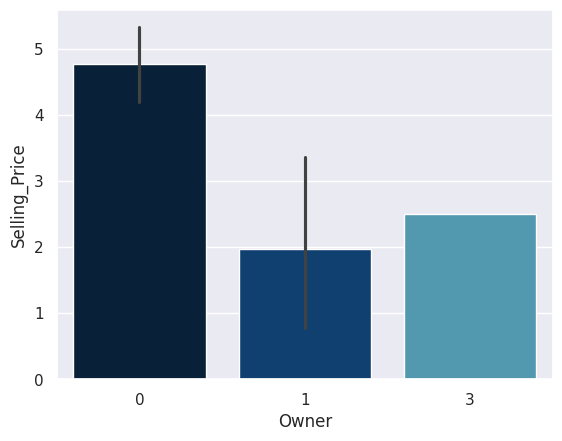

In [49]:
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='ocean')

In [51]:
def plot_categorical(feature, dataset):

    ax = sns.countplot(y=feature, data=dataset)

    plt.title('Distribution of' + feature)

    plt.xlabel('Count')

    total=len(dataset[feature])

    for p in ax.patches:

        percentage = '{:.1f}%'.format(100*p.get_width()/total)

        x = p.get_x() + p.get_width() + 0.02

        y = p.get_y() + p.get_height()/2

        ax.annotate(percentage, (x, y))

    plt.show()

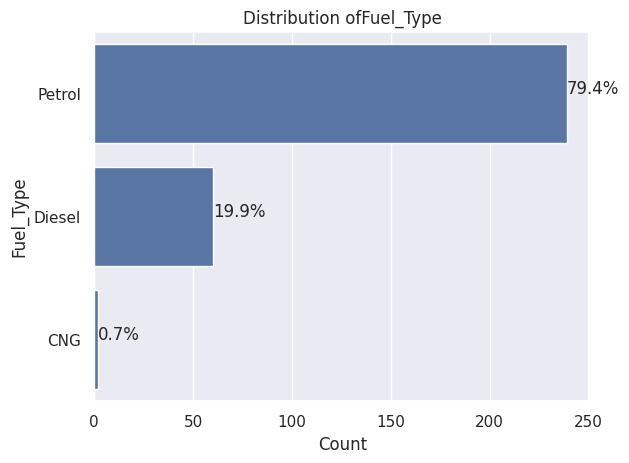

In [52]:
plot_categorical('Fuel_Type',df)

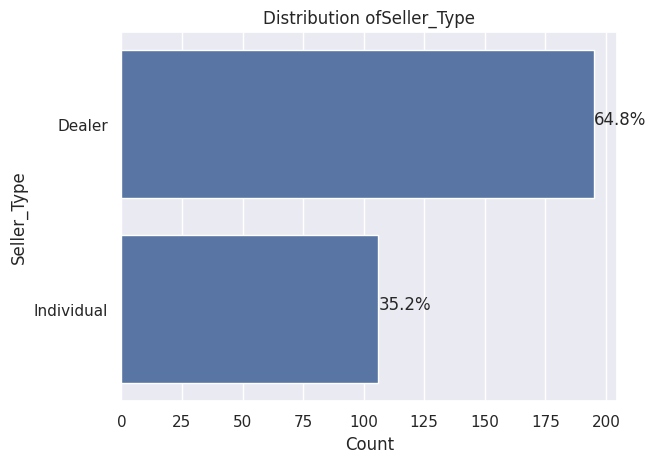

In [53]:
plot_categorical('Seller_Type',df)

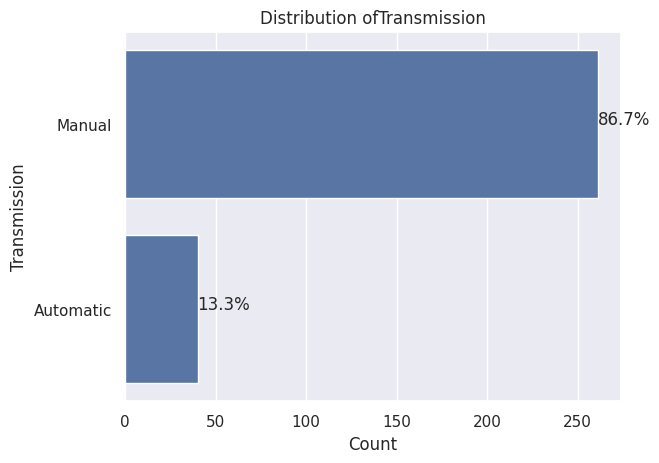

In [56]:
plot_categorical('Transmission',df)